# Phase 3 Project
*****


## BUSINESS UNDERSTANDING
***


***
From our initial look at Telecom's data, we see that they have an average churn rate of essentially 15%. There was no time frame given but this is usually measured over the course of a year. A general rule of thumb in business is that anything above 10% in terms of churning is too high.                                                           

This leads us to believe that the company is losing money.

There has been data that shows that acquiring new customers can cost 5x as much as retaining existing ones. Keeping this adage in mind is what is driving this project to attempt to lower the churn rate to anywhere from 10%-7%. If this can be successfully done the company can greatly increase it's profit margins.

## DATA UNDERSTANDING
***

In our previous notebook we gathered our needed data and explored what information was available to us to work with. A minimal amount of cleaning was needed, but now we need to continue our process of exploratory data analysis. We will inspect the dataframe and see what features are tied to the customer churn rate, and then attempt to exploit the results into better customer retention.

In [61]:
# Importing libraries that may be needed in our project along with removing scientific notation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 200)
pd.set_option('display.max_colwidth', 150)

In [2]:

clean_df = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_3/cleaned_data.csv')
clean_df.drop(clean_df.filter(regex="Unname"),axis=1, inplace=True)
clean_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,35,107,415,0,1,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,31,137,415,0,0,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,35,84,408,1,0,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,36,75,415,1,0,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [3]:
#Reference
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

## DATA PREPARATION 
***

After some prep work was done in the previous notebook we saw that there are 20 features and 3,333 observations/customers with an approximate churn rate of 15%. 
We will continue our exploratory data analysis with more visuals and looking at each individual feature to see what will best work for our modeling in terms of predicting and preventing customer turnover.

<h3><center>EDA</center></h3>


Moving forward it would be good to have an approach in terms of attempting to find what features are most likely to indicate customer churn rate. In the past we have used a correlation table which shows what features are most correlated to a chosen feature. We will use that again and work from there.

In [4]:
df_clean_corr=clean_df.corr()['churn'].map(abs).sort_values(ascending = False) 
df_clean_corr

churn                    1.000
international_plan       0.260
customer_service_calls   0.209
total_day_minutes        0.205
total_day_charge         0.205
voice_mail_plan          0.102
total_eve_minutes        0.093
total_eve_charge         0.093
number_vmail_messages    0.090
total_intl_charge        0.068
total_intl_minutes       0.068
total_intl_calls         0.053
total_night_charge       0.035
total_night_minutes      0.035
total_day_calls          0.018
account_length           0.017
total_eve_calls          0.009
state                    0.008
area_code                0.006
total_night_calls        0.006
Name: churn, dtype: float64

***

 Below will be a very useful library that creates great visuals and outputs a great amount of information in regards to associations and target analysis amongst other things. This report will be saved as its own notebook accessible from the main branch. 

 Certain features will be investigated more in this notebook, either due to a high correlation or as an attempt to better understand the data. 

***

In [20]:
import sweetviz as sv
sv_report = sv.analyze(clean_df, target_feat = 'churn')
sv_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Feature #1: International Plan

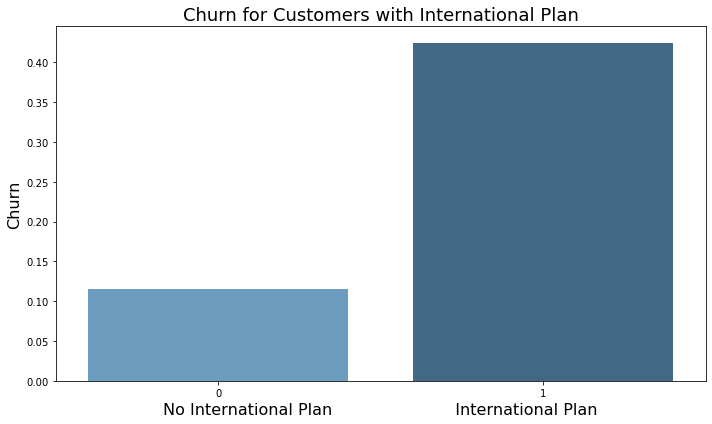

In [5]:
int_plan_churn = pd.DataFrame(clean_df.groupby(['international_plan'])['churn'].mean())
fig = plt.subplots(figsize = (10,6))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, palette="Blues_d")
plt.title('Churn for Customers with International Plan', fontsize = 18)
plt.xlabel('No International Plan                        International Plan', fontsize = 16)
plt.ylabel('Churn', fontsize = 16)
plt.tight_layout()

In [6]:
clean_df.groupby("international_plan")["churn"].value_counts(normalize = True)


international_plan  churn
0                   False   0.885
                    True    0.115
1                   False   0.576
                    True    0.424
Name: churn, dtype: float64

#### Findings:
According to the correlation table, having an international plan has the highest relationship with customer churn. So the visual makes it pretty clear that a customer WITH the international plan is much more likely to churn than the customer without the plan. And to make it more concise we see in the previous cell that the churn rate for the international plan is 42.4% opposed to 11.5% without it. 

</break>

We will have to take a look as to why this is the case, maybe there is no cost benefit to having the international plan or maybe people only sign up for it because they plan on travelling internationally and discard the plan upon return.



***

### Feature #2: Customer Service Calls

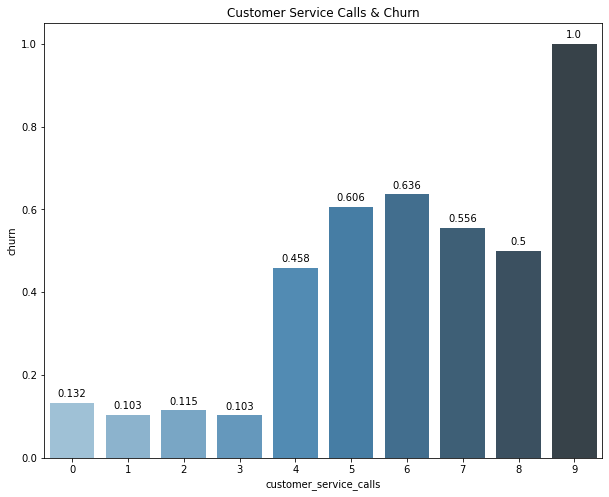

In [7]:
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='customer_service_calls', y='churn',
                    data=clean_df, palette='Blues_d', ci = None)
# Add annotations to bars(reference)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Customer Service Calls & Churn')
plt.show()

customer_service_calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       True       40
                        False      26
6                       True       14
                        False       8
7                       True        5
                        False       4
8                       False       1
                        True        1
9                       True        2
Name: churn, dtype: int64


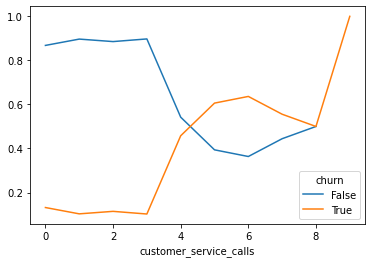

In [65]:
clean_df.groupby("customer_service_calls")["churn"].value_counts(normalize = True).unstack().plot()
print(clean_df.groupby("customer_service_calls")["churn"].value_counts())

#### Findings:
The findings here are somewhat predictable in the sense of the more times a customer has to call for service the more likely they are to churn. On the other hand it is worth pointing out that while the largest number of customer churn falls under 1 and 2 service calls respectively, the percentage of churn is at an acceptable level. The magic number of calls seems to be 4, where the percentage of customer churn is near 50% and for the most part only goes up from there.

***
###  Feature #3 :Total Day Minutes & Total Day Charge

In [73]:
day_df = clean_df[['total_day_minutes', 'total_day_charge', 'churn']]
day_df.head()


,total_day_minutes,total_day_charge,churn
0,265.100,45.070,False
1,161.600,27.470,False
2,243.400,41.380,False
3,299.400,50.900,False
4,166.700,28.340,False


In [30]:
day = day_df.groupby('churn').sum()
day.head()

,total_day_minutes,total_day_charge
churn,,
False,"499,250.900","84,874.200"
True,"99,939.500","16,989.970"


In [37]:
day_df.describe()

,total_day_minutes,total_day_charge
count,"3,333.000","3,333.000"
mean,179.775,30.562
std,54.467,9.259
min,0.000,0.000
25%,143.700,24.430
50%,179.400,30.500
75%,216.400,36.790
max,350.800,59.640


When looking into this feature, it makes sense to compare all the minute and rate categories against each other, that way we can can see if there is any obvious reason why one leads to more churn than the other. To do this we'll just divide the corresponding time of day minutes and charges against the median. 

In [79]:
day_price =(clean_df['total_day_charge']/clean_df['total_day_minutes']).median()
eve_price =(clean_df['total_eve_charge']/clean_df['total_eve_minutes']).median()
night_price =(clean_df['total_night_charge']/clean_df['total_night_minutes']).median()
int_price = (clean_df['total_intl_charge']/clean_df['total_intl_minutes']).median()
print("Day price", day_price)
print("Evening price", eve_price)
print("Night price", night_price)
print("International price", int_price)


Day price 0.17000415454923143
Evening price 0.085
Night price 0.045
International price 0.27


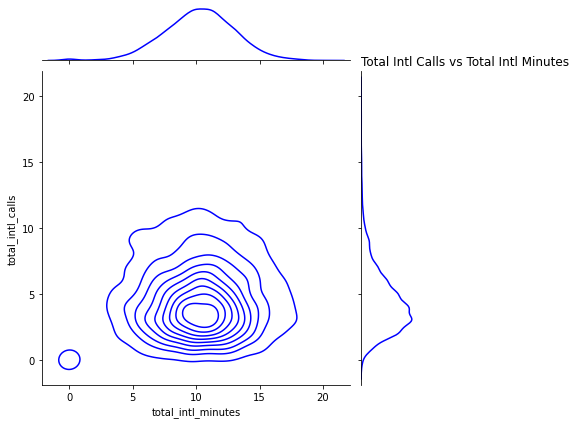

In [114]:
# Using this jointplot to see the distribution of international calls and minutes.
# It would seem the average call here is around 10minutes with a low voume of total calls.
sns.jointplot(x=clean_df["total_intl_minutes"], y=clean_df["total_intl_calls"], kind='kde', color="Blue")
plt.title('Total Intl Calls vs Total Intl Minutes', loc='left')
plt.show()

#### Findings:

These categories were a bit challenging just due to the fact that many of these plans features overlap, to say. But looking at our output from the 'sweetviz' library we see a general trend within the international minutes column of a churn rate that rises steadily as minute usage increases. The distribution of total international minutes looks quite ordinary. The same can be said for total international charges, a normal distribution with the churn rate rising steadily. For both those categories the churn rate reaches almost 25%.

At this point it would seem like the reason international plans have a high churn rate is because its the most expensive and does not seem to be used often. 



### Feature #4: Voicemail

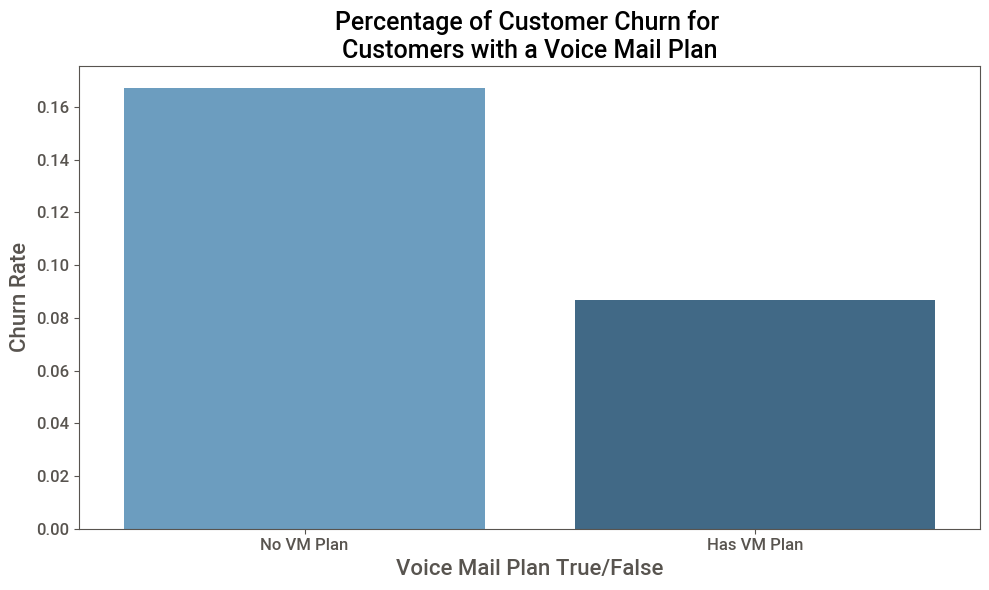

In [50]:
vm_churn = pd.DataFrame(clean_df.groupby(['voice_mail_plan'])['churn'].mean())

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = [0, 1], y = 'churn', data = vm_churn, palette = 'Blues_d', ax = ax)
plt.title('Percentage of Customer Churn for \nCustomers with a Voice Mail Plan', fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 12)
plt.xlabel('Voice Mail Plan True/False', fontsize = 16)
plt.ylabel('Churn Rate', fontsize = 16)
ax.set_xticklabels(['No VM Plan', 'Has VM Plan'])
plt.tight_layout()

#### Findings:

Having a voicemail plan looks like it would be advantageous for the company as it greatly reduces churn rate.


### Feature #5:  Account Length
Now looking at 'account length', we will attempt to visualize if there is a certain amount of days that if the customer makes it to, they are longer to stay with the service as opposed to churn.

In [46]:
clean_df['account_length'].describe()

count   3,333.000
mean      101.065
std        39.822
min         1.000
25%        74.000
50%       101.000
75%       127.000
max       243.000
Name: account_length, dtype: float64

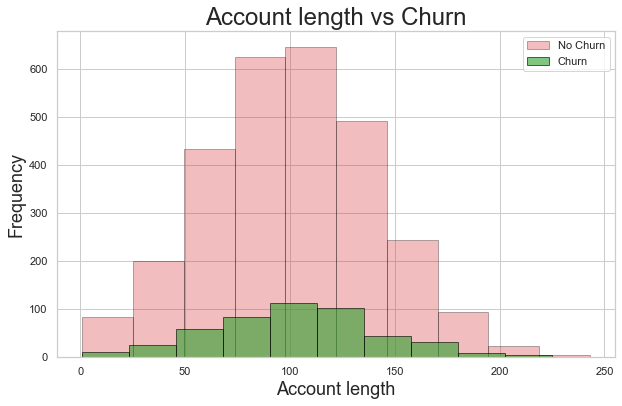

In [5]:
clean_df[clean_df['churn'] == 0].account_length.plot(kind='hist', color='tab:red', edgecolor='black', alpha=0.3, figsize=(10,6))
clean_df[clean_df['churn'] == 1].account_length.plot(kind='hist', color='tab:green', edgecolor='black', alpha=0.6, figsize=(10,6))
plt.legend(labels=['No Churn', 'Churn'])
plt.title('Account length vs Churn', size=24)
plt.xlabel('Account length', size=18)
plt.ylabel('Frequency', size=18)
plt.tight_layout

plt.show()

#### Findings: 
Looking at the information here we see there is normal distribution of account lengths, with the mean being 101 days. And if we reference the 'sweetviz' we see that at approximately 1 standard deviation past the mean, the churn rates starts to rise steadily going from 15% to 30%. 

It would seem their customer base generally does not stick around long. This could be to promotional rates or tough competition in the market. 

## DATA MODELING
***

In [52]:
# Preparing the data for our models:

y = clean_df["churn"]
X = clean_df.drop(["churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, stratify = y)

It is worth noting that since we have an imbalanced dataset, it is important to set our stratify parameter to 'yes'. This ensures that our random split will have the proper proportions. 

In [56]:
y_train.value_counts().sort_index()


False    2137
True      362
Name: churn, dtype: int64

In [57]:
# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the training data
y_train = pd.Series(encoder.fit_transform(y_train))

# Transform the test data
y_test = pd.Series(encoder.transform(y_test))

In [66]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 94.6%


## EVALUATION
***